<h1>Analysis and Prediction of Oil Production from a Fracking Well (Texas Fracking Data) using Decison Trees, Random Forest and Multilayer Perceptrons. </h1>

<b>What is fracking? </b>
Fracking is the process of drilling down into the earth before a high-pressure water mixture is directed at the rock to release the gas inside.
Water, sand and chemicals are injected into the rock at high pressure which allows the gas to flow out to the head of the well.

The process can be carried out vertically or, more commonly, by drilling horizontally to the rock layer, which can create new pathways to release gas or used to extend existing channels.

The term fracking refers to how the rock is fractured apart by the high-pressure mixture.



<b> Problem Statement and approach </b>

Here, we try to predict the Cumulative Production from a fracking well, based on 12 unique attributes and find out which factors are the most influential in decision making.

We first read the data and conduct the imputation and outlier removal. Then we draw the correlation matrix and try to find out the attributes that impact oil production and the attributes which are not strongly correlated to it. 

<b>About the Dataset </b>
The Dataset was provided by Prof Edward Jones, Executive Professor, Department of Statistics at Texas A&M University, College Station as a part of Academic work for course STAT 656. 
The Dataset consists of 4752 unique data points and 12 attributes and 1 target. This is a real data (not simulated) from Texas Oil Fracking operations.

<h3>Data Summary</h3>

1. Log_Cum_Production - Interval (Target)
2. Log_Proppant_LB - Interval
3. Log_Carbonate - Interval
4. Log_Frac_Fluid_GL - Interval
5. Log_GrossPerforatedInterval - Interval
6. Log_LowerPerforated_xy - Interval
7. Log_UpperPerforated_xy - Interval
8. Log_TotalDepth - Interval
9. N_Stages - Interval
10. X_Well - Interval
11. Y_Well - Interval
12. Operator - Nominal
13. County - Nominal

<h3> <u> Table of Contents </u></h3>
<p> </p>


1. Reading the Dataset, Data Replacement, Preprocessing and Imputation
2. Data visualization and correlation mapping
3. MLP modeling
4. Decision Tree modeling
5. Random Forest Modeling
6. Final Model Selection and Conclusion
7. References

<b>1. Reading the Dataset, Data Replacement, Preprocessing and Imputation </b>

In [2]:
import pandas as pd
import numpy as np
from AdvancedAnalytics import DecisionTree
df = pd.read_excel('OilProduction(1).xlsx')

In [3]:
attribute_map = {
        'Log_Cum_Production':['I', (8, 15)],
        'Log_Proppant_LB':['I', (6, 18)],
        'Log_Carbonate':['I',(-4, +4)],
        'Log_Frac_Fluid_GL':['I',(7,18)],
        'Log_GrossPerforatedInterval':['I',(4,9)],
        'Log_LowerPerforation_xy':['I',(8,10)],
        'Log_UpperPerforation_xy':['I',(8,10)],
        'Log_TotalDepth':['I', (8,10)],
        'N_Stages':['I', (2,14)],
        'X_Well':['I',(-100,-95)],
        'Y_Well':['I',(30,35)],
        'Operator':['N',(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28)],
        'County':['N',(1,2,3,4,5,6,7,8,9,10,11,12,13,14)],
        }
from AdvancedAnalytics import ReplaceImputeEncode
rie = ReplaceImputeEncode(data_map=attribute_map, nominal_encoding='one-hot', drop=False, display=True)
encoded_df = rie.fit_transform(df)
Y = np.asarray(encoded_df['Log_Cum_Production'])
X = np.asarray(encoded_df.drop('Log_Cum_Production', axis=1))
col = rie.col
col.remove("Log_Cum_Production")


********** Data Preprocessing ***********
Features Dictionary Contains:
11 Interval, 
0 Binary, 
2 Nominal, and 
0 Excluded Attribute(s).

Data contains 4752 observations & 13 columns.


Attribute Counts
.................................. Missing  Outliers
Log_Cum_Production...........         0         0
Log_Proppant_LB..............         0         0
Log_Carbonate................         0         0
Log_Frac_Fluid_GL............         0         0
Log_GrossPerforatedInterval..         0         0
Log_LowerPerforation_xy......         0         0
Log_UpperPerforation_xy......         0         0
Log_TotalDepth...............         0         0
N_Stages.....................         0         0
X_Well.......................         0         0
Y_Well.......................         0         0
Operator.....................         0         0
County.......................         0         0


C:\Users\Arindam Baisya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arindam Baisya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Arindam Baisya\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categ

<b>2. Data visualization and correlation mapping </b>

In [5]:
# Computation of the correlation matrix
import math
corr = encoded_df.corr()
corr

,Log_Cum_Production,Log_Proppant_LB,Log_Carbonate,Log_Frac_Fluid_GL,Log_GrossPerforatedInterval,Log_LowerPerforation_xy,Log_UpperPerforation_xy,Log_TotalDepth,N_Stages,X_Well,...,County4,County5,County6,County7,County8,County9,County10,County11,County12,County13
Log_Cum_Production,1.000000,0.255552,0.004668,0.279557,0.014870,0.496999,0.395112,0.038659,0.015032,0.496613,...,-0.181888,-0.102846,-0.216197,-0.171124,0.179843,-0.084313,-0.242919,-0.078939,0.283823,0.034825
Log_Proppant_LB,0.255552,1.000000,0.005287,0.275775,0.014597,0.268186,0.006126,0.026375,-0.012291,0.078872,...,-0.014015,0.011724,0.156329,-0.037128,0.083007,-0.019730,-0.137644,0.045814,-0.076392,-0.026440
Log_Carbonate,0.004668,0.005287,1.000000,-0.019995,-0.009491,-0.048526,-0.050640,0.001436,0.005827,-0.044436,...,0.011291,0.002881,0.031851,0.009076,-0.035783,-0.003050,0.037019,-0.032592,0.008421,0.005502
Log_Frac_Fluid_GL,0.279557,0.275775,-0.019995,1.000000,0.019176,0.330259,0.182820,0.022145,0.000126,0.218780,...,-0.089426,0.004110,0.007519,-0.142354,-0.030862,-0.091829,-0.103573,0.005387,0.064229,0.079866
Log_GrossPerforatedInterval,0.014870,0.014597,-0.009491,0.019176,1.000000,0.035619,0.026067,0.031342,-0.013919,0.009907,...,-0.019320,0.017389,-0.022519,0.010024,0.008260,0.014278,0.000562,0.016443,-0.005561,-0.008082
Log_LowerPerforation_xy,0.496999,0.268186,-0.048526,0.330259,0.035619,1.000000,0.685063,0.064246,0.006213,0.650113,...,-0.179434,0.138675,-0.264459,-0.133550,0.202843,-0.117060,-0.257710,-0.125195,0.067968,0.050681
Log_UpperPerforation_xy,0.395112,0.006126,-0.050640,0.182820,0.026067,0.685063,1.000000,0.022049,0.008756,0.857564,...,-0.358270,0.174844,-0.411352,-0.151548,0.165623,-0.197379,-0.244269,-0.167544,0.161156,0.108375
Log_TotalDepth,0.038659,0.026375,0.001436,0.022145,0.031342,0.064246,0.022049,1.000000,-0.026922,0.032588,...,0.010153,-0.015833,-0.043091,0.003766,0.053393,0.004854,-0.030349,-0.030922,0.017290,-0.022755
N_Stages,0.015032,-0.012291,0.005827,0.000126,-0.013919,0.006213,0.008756,-0.026922,1.000000,-0.002957,...,0.024686,0.012583,-0.025229,-0.017056,0.015297,-0.007677,-0.009064,-0.001309,-0.020112,0.036165
X_Well,0.496613,0.078872,-0.044436,0.218780,0.009907,0.650113,0.857564,0.032588,-0.002957,1.000000,...,-0.361137,0.153548,-0.322546,-0.324263,0.296307,-0.234732,-0.370381,-0.092205,0.259395,-0.064894


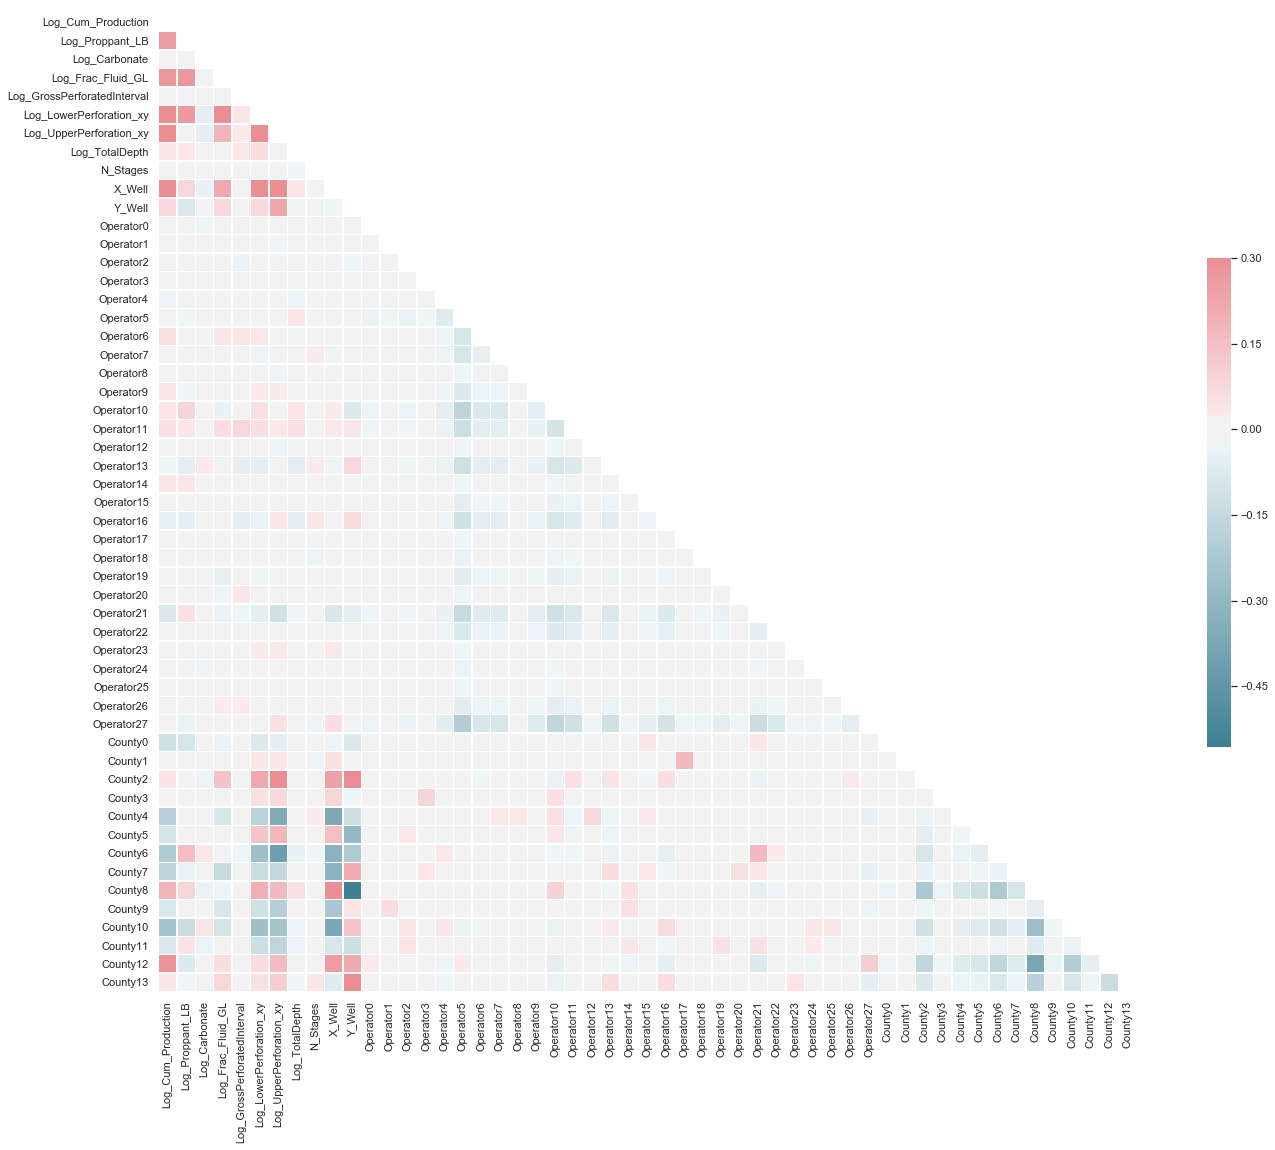

In [6]:
#plotting of heatmap of correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\Arindam Baisya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


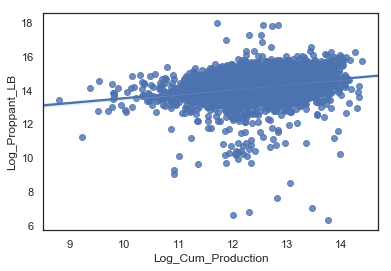

In [7]:
sns.regplot(x=df["Log_Cum_Production"], y=df["Log_Proppant_LB"])

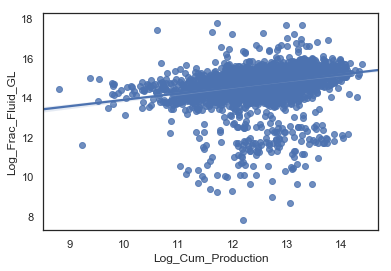

In [8]:
sns.regplot(x=df["Log_Cum_Production"], y=df["Log_Frac_Fluid_GL"])

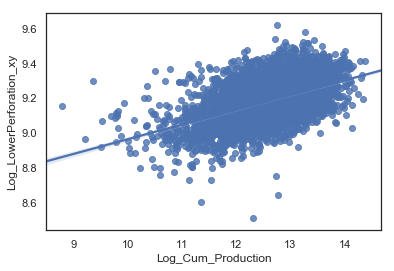

In [23]:
sns.regplot(x=df["Log_Cum_Production"], y=df["Log_LowerPerforation_xy"])

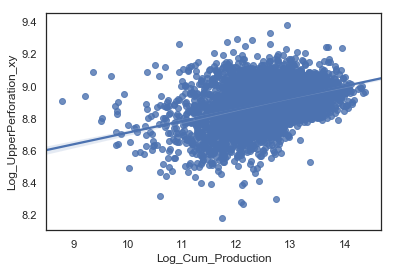

In [24]:
sns.regplot(x=df["Log_Cum_Production"], y=df["Log_UpperPerforation_xy"])

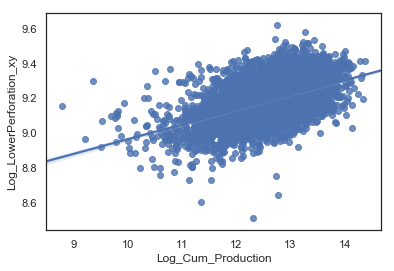

In [9]:
sns.regplot(x=df["Log_Cum_Production"], y=df["Log_LowerPerforation_xy"])

C:\Users\Arindam Baisya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


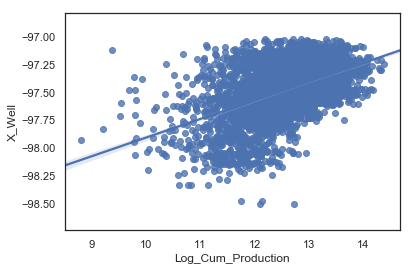

In [21]:
sns.regplot(x=df["Log_Cum_Production"], y=df["X_Well"])

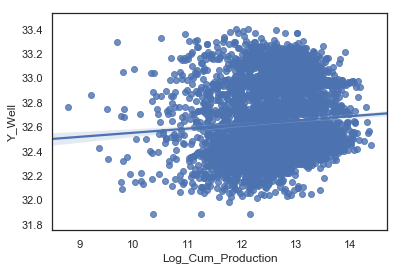

In [22]:
sns.regplot(x=df["Log_Cum_Production"], y=df["Y_Well"])

<b> 3. MLP modeling </b>

In [12]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

network_list = [(3), (11), (5,4), (6,5), (7,6), (8,7)]
for nn in network_list:
    fnn = MLPRegressor(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=1000, random_state=12345,tol=0.00000000001)
    scores_MLP = cross_val_score(fnn, X, Y, cv=4, scoring='r2')
    print("Network", nn, "R squared value", scores_MLP)
    print("Network", nn, "Mean R squared value", scores_MLP.mean())
    

Network 3 R squared value [0.38623575 0.40397276 0.34111588 0.40907667]
Network 3 Mean R squared value 0.38510026417563614
Network 11 R squared value [0.37315471 0.40087253 0.39133259 0.3412736 ]
Network 11 Mean R squared value 0.3766583562895026
Network (5, 4) R squared value [0.3726156  0.40436977 0.3951831  0.38496507]
Network (5, 4) Mean R squared value 0.38928338588682304
Network (6, 5) R squared value [0.39004978 0.40881154 0.37407034 0.38643586]
Network (6, 5) Mean R squared value 0.38984187930086545
Network (7, 6) R squared value [0.38842794 0.4176192  0.393836   0.41536673]
Network (7, 6) Mean R squared value 0.40381246743573396
Network (8, 7) R squared value [0.40532688 0.39516576 0.40020833 0.34403172]
Network (8, 7) Mean R squared value 0.38618317238611


In [16]:
#Choosing the best model amongst the all
fnn = MLPRegressor(hidden_layer_sizes=(7,6),solver="lbfgs",alpha=0, activation="relu", max_iter=1000, random_state=12345,tol=0.00000000001)
scores_MLP = cross_val_score(fnn, X, Y, cv=4, scoring='r2')
print("Best Network (7,6) R squared value", scores_MLP)
print("Best Network (7,6) Mean R squared value", scores_MLP.mean())


Best Network (7,6) R squared value [0.38842794 0.4176192  0.393836   0.41536673]
Best Network (7,6) Mean R squared value 0.40381246743573396


<b>4. Decision Tree modeling </b>

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_val_score

depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for b in depth:
    regressor = DecisionTreeRegressor(max_depth=b, min_samples_split=5, min_samples_leaf=5)
    regressor = regressor.fit(X,Y)
    scores_tree = cross_val_score(regressor, X, Y, cv=4, scoring='r2')
    print("Depth", b, "R squared value", scores_tree)
    print("Network", b, "Mean R squared value", scores_tree.mean())


Depth 3 R squared value [0.3537452  0.38088603 0.36202716 0.35511938]
Network 3 Mean R squared value 0.36294444246082985
Depth 4 R squared value [0.38139735 0.40330392 0.39249162 0.39574484]
Network 4 Mean R squared value 0.39323443399979535
Depth 5 R squared value [0.43157032 0.41980407 0.40160256 0.40359351]
Network 5 Mean R squared value 0.4141426129957636
Depth 6 R squared value [0.44429933 0.40716449 0.41893636 0.39706984]
Network 6 Mean R squared value 0.4168675065536506
Depth 7 R squared value [0.4600432  0.41409279 0.41024329 0.40328279]
Network 7 Mean R squared value 0.42191551917084125
Depth 8 R squared value [0.44223035 0.40589181 0.40842869 0.38360155]
Network 8 Mean R squared value 0.4100380993300943
Depth 9 R squared value [0.43841375 0.384236   0.38372029 0.36015416]
Network 9 Mean R squared value 0.391631048434514
Depth 10 R squared value [0.40038435 0.35241236 0.3710919  0.33153847]
Network 10 Mean R squared value 0.3638567701973662
Depth 11 R squared value [0.39115539

In [19]:
#Choosing the best model amongst all
regressor = DecisionTreeRegressor(max_depth=7, min_samples_split=5, min_samples_leaf=5)
regressor = regressor.fit(X,Y)
scores_tree = cross_val_score(regressor, X, Y, cv=4, scoring='r2')
print("Best depth 7 R squared value", scores_tree)
print("Best Tree 7 Mean R squared value", scores_tree.mean())


Best depth 7 R squared value [0.4600432  0.41409279 0.41024329 0.40328279]
Best Tree 7 Mean R squared value 0.4219155191708413


<b>5. Random Forest Modeling </b>

In [14]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X, Y)
scores_forest = cross_val_score(regr, X, Y, cv=4, scoring='r2')
DecisionTree.display_metrics(regr, X, Y)
print("Random Forest, ", "R squared value", scores_forest)
print("Mean R squared value", scores_forest.mean())

C:\Users\Arindam Baisya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Model Metrics
Observations...........     4752
Split Criterion........      mse
Max Depth..............     None
Minimum Split Size.....        2
Minimum Leaf  Size.....        1
R-Squared..............   0.9112
Mean Absolute Error....   0.1440
Median Absolute Error..   0.1009
Avg Squared Error......   0.0423
Square Root ASE........   0.2057
Random Forest,  R squared value [0.53619839 0.50624608 0.51566952 0.50246347]
Mean R squared value 0.5151443663549313


<b>6. Final Model Selection and Conclusion </b>

In [20]:
#Comapring all models
print("Mean R squared value for Random Forest", scores_forest.mean())
print("Best Mean R squared value for Decision Tree", scores_tree.mean())
print("Best Mean R squared value for Multilayer Perceptron", scores_MLP.mean())

Mean R squared value for Random Forest 0.5151443663549313
Best Mean R squared value for Decision Tree 0.4219155191708413
Best Mean R squared value for Multilayer Perceptron 0.40381246743573396


Conclusion: 
1. We get the best prediction with Random Forests(R squared value of 0.515)
2. We get strong correlations of Production with Frac Liquid, Perforation, Lower and Upper Perforation, X_well and Y_Well(Oil oils tend to produce more oil as we more towards North West). These apppear to be well matching the domain understanding of Fracking.
3. The factors the show nearly no correlation are Log Carbonate, Operator(The choice of operator appears to have negligible effect on Oil Production), Log of GrossPerforatedInterval, Log_TotalDepth and N_Stages.

<b>7. References </b>

1. https://www.bbc.com/news/uk-14432401 
2. http://analytics-magazine.org/how-prescriptive-analytics-can-reshape-fracking-in-oil-and-gas-fields/
3. https://blog.riverlogic.com/how-prescriptive-analytics-reshapes-fracking-in-oil-and-gas-fields

